In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
datos,metadatos=tfds.load('fashion_mnist',as_supervised=True,with_info=True)


In [4]:
dattrain,dattest=datos['train'],datos['test']
nombresclases=metadatos.features['label'].names


normalizacion de los datos 
donde pasamos los datos de 0-255 a 0-1

In [5]:
def normalizar(images, tags):
    images=tf.cast(images,tf.float32)
    images/=255
    return images,tags
# normalizamos con los datos adquiridos 
dattrain=dattrain.map(normalizar)
dattest=dattest.map(normalizar)
dattrain=dattrain.cache()
dattest=dattest.cache()


In [6]:
#creacion del modelo 
modelo=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [7]:
# compilacion del modelo creado con keras 
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']

)
numtrain=metadatos.splits["train"].num_examples
numtest=metadatos.splits["test"].num_examples
numtest,numtrain


(10000, 60000)

In [8]:
sizelot=32
dattrain=dattrain.repeat().shuffle(numtrain).batch(sizelot)
dattest=dattest.batch(sizelot)
#entrenamiento 
import math

historial=modelo.fit(dattrain,epochs=5,steps_per_epoch=math.ceil(numtrain/sizelot))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5105 - accuracy: 0.8191
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3848 - accuracy: 0.8611
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3487 - accuracy: 0.8733
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3272 - accuracy: 0.8792
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8848


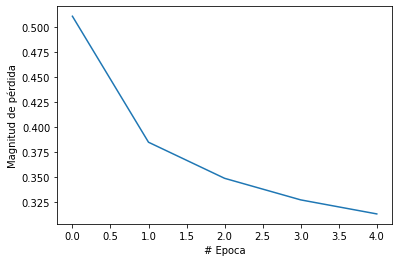

In [10]:
#Ver la funcion de perdida

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [12]:
import numpy as np

for imagenes_prueba, etiquetas_prueba in dattest.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
imagetest= imagenes_prueba[20] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh
imagetest = np.array([imagetest])
prediccion = modelo.predict(imagetest)

print("Prediccion: " + nombresclases[np.argmax(prediccion[0])])


1/1 [==============================] - 0s 15ms/step
Prediccion: T-shirt/top


In [ ]:
modelo.save('modelexportexamplekeras.h5')